In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic as m

In [2]:
data = pd.read_csv("taxi-trips.csv") #opening a file and reads it with using panda as pd and pd.read_csv
data["pickup_district"] = ""      # new column named to geocoder (pick-up)
data["dropoff_district"] = ""      #new column named  to geocoder(drop-off)



In [3]:
pickup_longitude_array = []
pickup_longitude_array = []
pickup_latitude_array = []
dropoff_longitude_array = [] #
dropoff_latitude_array = []
pickup_location_array = []
dropoff_location_array = []
distance_array = []

In [4]:
#with using fil(data) I create a new column[pickup_district] with using reverse geocoding (rg.) .
#I use a list to generate a new column 
data["pickup_district"] = [i["name"] for i in rg.search(
    list(zip(data.pickup_latitude, 
        data.pickup_longitude)))]


#with using fil(data) I create a new column["dropoff_district"] with using reverse geocoding (rg.) .

data["dropoff_district"] = [i["name"] for i in rg.search(
    list(zip(
        data.dropoff_latitude, 
        data.dropoff_longitude)))]


#in my first codes i used for loops and it was worjking correct because i cut most of the taxi-trips.csv, it was like 100 rows.
#when i tried to read all the rows i recognized it takes too much time to run all the programme.
#To make it shorten(faster) i used zipped lists. I found this code from https://stackoverflow.com/ and designed for my project in 15.03.19. 


Loading formatted geocoded file...


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


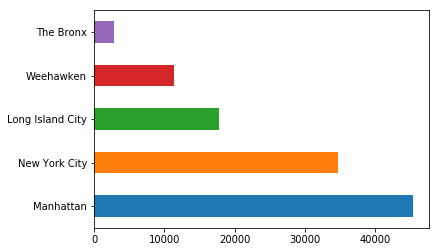

In [5]:
#this function shows us the top five pickup districs by using [:n].

pickup_districts = data.pickup_district.value_counts()
print(pickup_districts[:5])
#in recitation week3 we learned to visualize the data. I used this to show first 5 districs by using .head(5).plot() function. 
pickup_districts.head(5).plot(kind='barh')

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


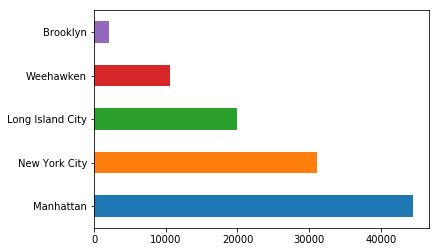

In [6]:
# this function shows us the top five dropoff districs by using [:n].

dropoff_districts = data.dropoff_district.value_counts()
print(dropoff_districts[:5])
#in recitation week3 we learned to visualize the data. I used this to show first 5 districs by using .head(5).plot() function.
dropoff_districts.head(5).plot(kind='barh')

In [7]:
# print(data()) #only see the first 5 rows because otherwise it takes too much time

In [8]:
#to calculate the distance i used library of geodesic as m and calculated the distance with .kilometers. I used a for loop for do it all the k and l variables.

data['distance'] = [ m(k,l).kilometers 
                    for k,l in zip(
                        zip(data.pickup_latitude, data.pickup_longitude),
                        zip(data.dropoff_latitude, data.dropoff_longitude))]

In [9]:
# import the date to use functions faster for programme. I define two different time one of them(time1) is return year, month, day, hour, minute, second.
#otherone(time2) is using time1 and sptlists a day based on hours. Rush Hour Morning, Late Night, Rush Hour Evening, Afternoon, Evening, Late Night.
#this spliting day in based on diiferent times will help us next part of programme. For example calculating the mean distance in different hours.
import datetime
def time1(dtime):
    return datetime.datetime.strptime(dtime,'%Y-%m-%d %H:%M:%S')

def time2(dtime):
    d = time1(dtime)
    h = d.hour
    if 0 <= h < 9:
        return 'Rush Hour Morning'
    elif 7 <= h < 7:
        return 'Late Night'
    elif 9 <=h < 18:
        return 'Rush Hour Evening'
    elif 16 <= h < 16:
        return 'Afternoon'
    elif h < 23:
        return 'Evening'
    else:
        return 'Late Night'
    
data["time"] = [time2(i) for i in data.pickup_datetime]

In [10]:
#date class helps me to calculate the time between pickup time and dropoff time. firs i calculate it for seconds(.seconds()) then divide it 60 because i want to calculate it as minutes.

data["duration"] = [(time1(k)-time1(l)).total_seconds()/60 
                    for k,l in zip(data.dropoff_datetime,data.pickup_datetime)]

                time  distance
0            Evening  3.378136
1         Late Night  4.014632
2  Rush Hour Evening  3.162453
3  Rush Hour Morning  3.755873


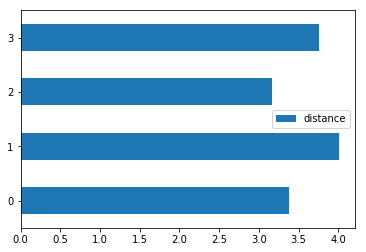

In [11]:
#I searcehed for calculating distance with columns and create a new ipcture. I found an example code from https://stackoverflow.com/questions/847066/group-by-multiple-columns and i designed it for my project.
#with this part my code prints the parts of day and the distances.
distance_mean = data[["distance","time"]].groupby(["time"], as_index=False).mean()
print(distance_mean)
distance_mean.plot(kind='barh')

                time   duration
0            Evening  14.893255
1         Late Night  15.203985
2  Rush Hour Evening  16.292876
3  Rush Hour Morning  14.612133


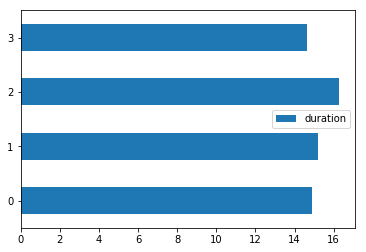

In [12]:
#I searcehed for calculating distance with columns and create a new ipcture. I found an example code from https://stackoverflow.com/questions/847066/group-by-multiple-columns and i designed it for my project.
#with this part my code prints the parts of day and the duration.
duration_mean = data[["duration","time"]].groupby(["time"], as_index=False).mean()
print(duration_mean)
duration_mean.plot(kind='barh')

In [13]:
#hyphotesis 1
#
from scipy.stats import ttest_ind
tek = data.passenger_count<=1;
cift = data.passenger_count>1;

print (data[tek].duration.mean(), data[cift].duration.mean())
ttest = ttest_ind(data[tek].distance, data[cift].distance)

person = ttest[1]

if person < 0.05:
    print ("Reject Null Hypothesis")
else:
    print ("Null Cannot Be Rejected")

14.973369633988142 16.64640640522481
Reject Null Hypothesis


In [14]:
#hyphotesis 2

def isweekday(d):
    return time1(d).weekday()<=4

from scipy.stats import ttest_ind
w_day = [isweekday(i) for i in data.pickup_datetime]
w_end = [isweekday(i)==0 for i in data.pickup_datetime]

print (data[w_day].duration.mean(), data[w_end].duration.mean())

ttest = ttest_ind(data[w_day].distance, data[w_end].distance)
p = ttest[1]

if p < 0.05:
    print ("Reject Null Hypothesis")
else:
    print ("Null Cannot Be Rejected")

15.687140044646261 14.890360277313633
Reject Null Hypothesis
